<a href="https://colab.research.google.com/github/OCanSagbas/AI-DataScience/blob/main/DigitRecognitionMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets

class DigitRecognition:
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.batch_size = batch_size

    def data_iterator(self):
        batch_number = len(self.X) // self.batch_size
        for i in range(batch_number):
            start_idx = i * self.batch_size
            end_idx = (i + 1) * self.batch_size
            yield self.X[start_idx:end_idx], self.y[start_idx:end_idx]

    def preprocess_data(self, data):
        return list(map(lambda x: x * 2, data))

    def apply_preprocessing(self, data):
        return list(map(self.preprocess_data, data))
     #   return list(map(lambda sublist: list(map(lambda x: x * 2, sublist)), data))

    def train_model(self, X_train, y_train):
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='micro')
        recall = recall_score(y_test, predictions, average='micro')
        f1 = f1_score(y_test, predictions, average='micro')
        return accuracy, precision, recall, f1

mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

digit_recognition = DigitRecognition(X_train, y_train, batch_size=64)
X_train_processed = digit_recognition.apply_preprocessing(X_train)
X_test_processed = digit_recognition.apply_preprocessing(X_test)

trained_model = digit_recognition.train_model(X_train_processed, y_train)

accuracy, precision, recall, f1 = digit_recognition.evaluate_model(trained_model, X_test_processed, y_test)
print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Accuracy: 0.9694444444444444
Precision: 0.9694444444444444
Recall: 0.9694444444444444
F1 Score: 0.9694444444444444


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # MLPClassifier eklenmiş
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets

class DigitRecognition:
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.batch_size = batch_size

    def data_iterator(self):
        batch_number = len(self.X) // self.batch_size
        for i in range(batch_number):
            start_idx = i * self.batch_size
            end_idx = (i + 1) * self.batch_size
            yield self.X[start_idx:end_idx], self.y[start_idx:end_idx]

    def preprocess_data(self, data):
        return list(map(lambda x: x * 2, data))

    def apply_preprocessing(self, data):
        return list(map(self.preprocess_data, data))

    def train_model(self, X_train, y_train):
        model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000)  # MLPClassifier kullanıldı
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='micro')
        recall = recall_score(y_test, predictions, average='micro')
        f1 = f1_score(y_test, predictions, average='micro')
        return accuracy, precision, recall, f1


mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

digit_recognition = DigitRecognition(X_train, y_train, batch_size=64)
X_train_processed = digit_recognition.apply_preprocessing(X_train)
X_test_processed = digit_recognition.apply_preprocessing(X_test)

trained_model = digit_recognition.train_model(X_train_processed, y_train)

accuracy, precision, recall, f1 = digit_recognition.evaluate_model(trained_model, X_test_processed, y_test)
print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Accuracy: 0.9638888888888889
Precision: 0.9638888888888889
Recall: 0.9638888888888889
F1 Score: 0.9638888888888889


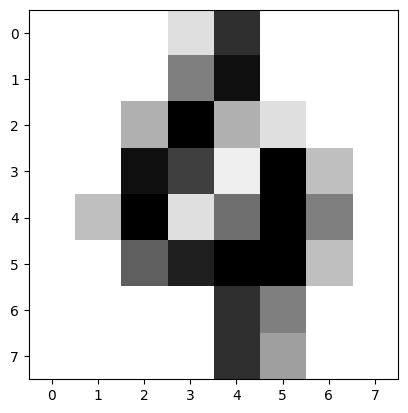

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[100]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show()